In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#seaborndan veri setini yükleme
tips = sns.load_dataset('tips')

#ilk 5 veriyi gösterme
display(tips.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
#son 5 veriyi gösterme
display(tips.tail())

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [32]:
#verisetinin genel yapısı
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [33]:
#verisetindeki sayısal verilerin istatistikleri
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


- total hesapda max aykırı değerler bulunuyor
- hesapların çoğu 13.35 ile 24.13 arasında yoğunlaşmış
- standart sapma 8.90, yani hesap tutarlarında belirgin bir değişkenlik var
- müşterilerin yarısı 2.90'dan az, yarısı daha fazla bahşiş bırakıyor
- bahşişler genellikle ortalama değere yakın, değişkenlik çok yok
- bahşişlerin çoğu 2 ile 3.5 arasında yoğunlaşmış
- masaların çeyreklik aralığı 2 ile 3, yani çoğu masa 2 veya 3 kişilik


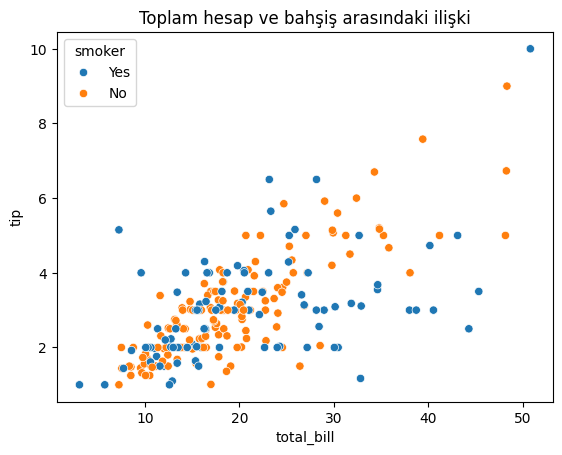

In [34]:
# Toplam hesap ve bahşiş arasındaki ilişkiyi scatter plot ile gösterme
sns.scatterplot(data=tips, x="total_bill", y="tip",hue="smoker")
plt.title('Toplam hesap ve bahşiş arasındaki ilişki')
plt.show()

- Toplam hesabı az olanlar az bahşiş bırakmışlar, sigara içmeyenler daha az bahşiş bırakmış. En yüksek hesap ödeyen kişi sigara içiyor

<ipython-input-35-3efb2d7ede6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tips, x="day",y="total_bill",palette='pastel')


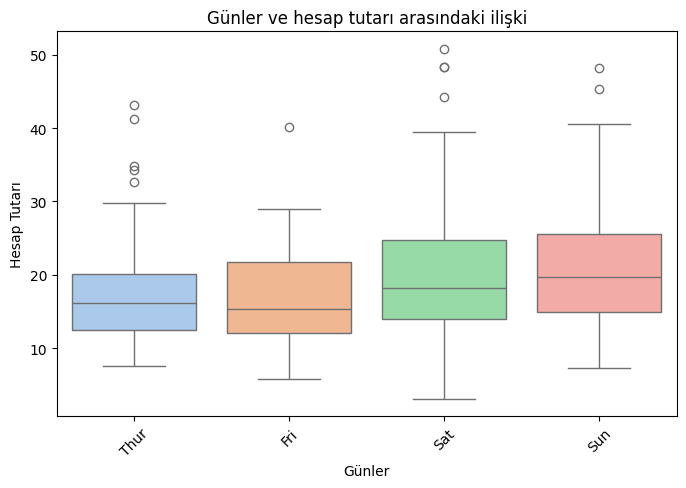

In [35]:
# Günlere göre hesap dağılımını boxplot ile görme

plt.figure(figsize=(8, 5))
sns.boxplot(data=tips, x="day",y="total_bill",palette='pastel')
plt.title('Günler ve hesap tutarı arasındaki ilişki')
plt.xlabel('Günler')
plt.ylabel('Hesap Tutarı')
plt.xticks(rotation=45)
plt.show()

- Pazar günleri daha çok hesap ödenmiş
- Perşembe günü aykırı değer daha fazla
- Perşembe günü hesap yaklaşık 15-20 aralığında, Cuma günü 14-23, Cumartesi 16-26, Pazar 18-28


In [36]:
#Yeni sütun ekleme
tips["tip_rate"] = (tips["tip"] / tips["total_bill"]) * 100

display(tips)



,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


<ipython-input-37-d32230566489>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_rate_mean,x="size",y="tip_rate",palette="viridis")


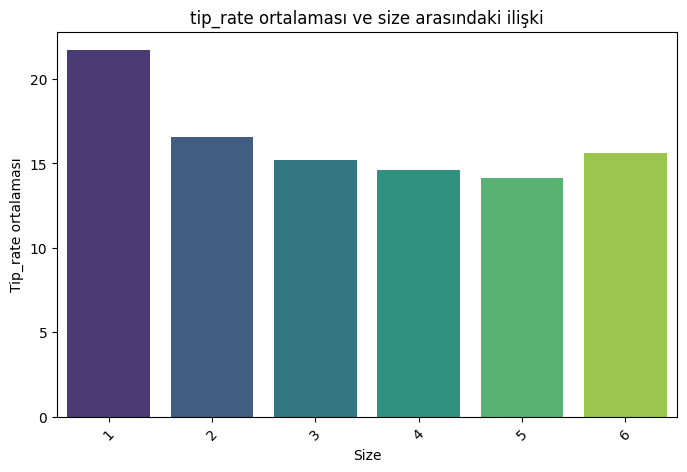

In [37]:
#Barplot kullanarak tip_rate ve size arasındaki ilişkiyi inceleme
tip_rate_mean=tips.groupby("size")["tip_rate"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=tip_rate_mean,x="size",y="tip_rate",palette="viridis")
plt.title("tip_rate ortalaması ve size arasındaki ilişki")
plt.xlabel("Size")
plt.ylabel("Tip_rate ortalaması")
plt.xticks(rotation=45)
plt.show()

- 1 kişilik masalar daha fazla bahşiş bırakmış sonra 6 kişilik

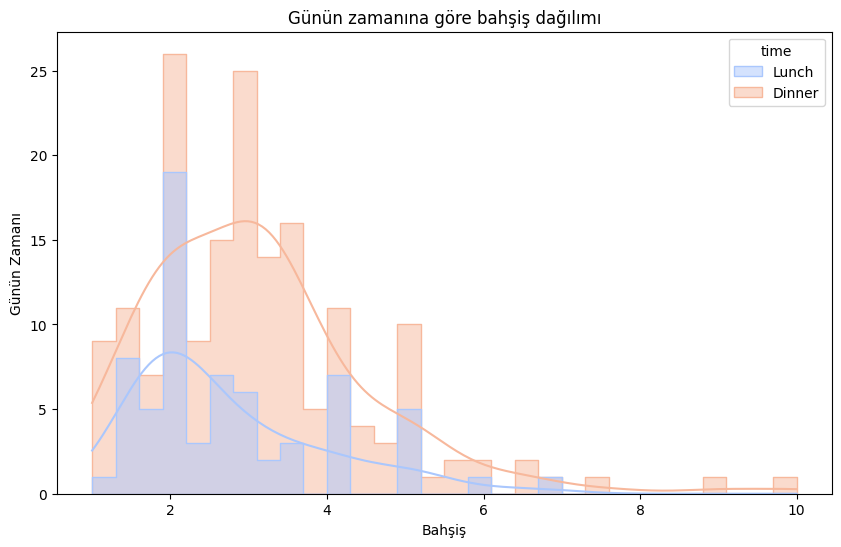

In [38]:
# Günün zamanına göre bahşiş dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(data=tips, x='tip', hue='time', kde=True,
             bins=30, palette='coolwarm', alpha=0.5, element='step')

# Başlık ve eksen isimleri
plt.title('Günün zamanına göre bahşiş dağılımı')
plt.xlabel('Bahşiş')
plt.ylabel('Günün Zamanı')

plt.show()

- Akşam bahşiş verilme durumu daha fazla
- Öğlen en çok 2 bahşiş bırakılmış

**EKSTRA**

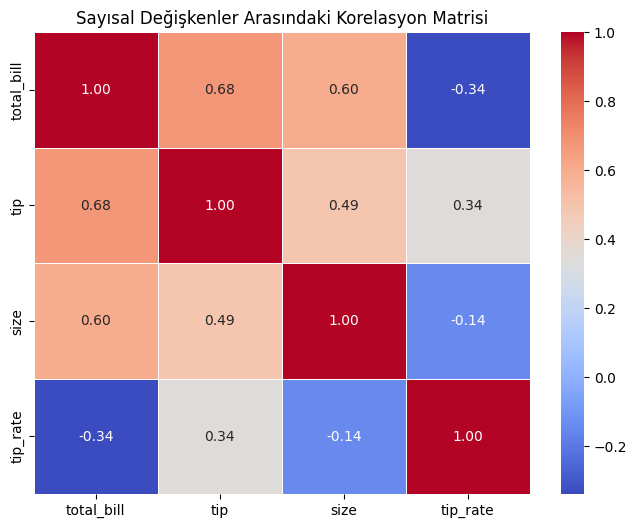

In [43]:
# Sadece sayısal değişkenleri seç
numerical_tips = tips.select_dtypes(include=["int64", "float64"])

# Sayısal değişkenler arasındaki korelasyon matrisi
corr_matrix = numerical_tips.corr()

# Heatmap ile görselleştirme
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Başlık ekleme
plt.title('Sayısal Değişkenler Arasındaki Korelasyon Matrisi')
plt.show()


- total_bill ile tip arasında yüksek bir pozitif korelasyon var, toplam hesap arttıkça bahşiş de genelde artmış
- size ile total bill korelasyonu da yüksek, masa büyüklüğü arttıkça toplam hesap artmış
